In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# useful links:
# https://towardsdatascience.com/clustering-product-names-with-python-part-1-f9418f8705c8 (VPN needed)
# https://towardsdatascience.com/clustering-product-names-with-python-part-2-648cc54ca2ac
# https://stackoverflow.com/questions/56840573/python-sklearn-how-to-get-clusters-and-cluster-names-after-doing-kmeans
# https://machinelearningmastery.ru/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a/

In [38]:
df = pd.read_csv('data.csv', header=None, usecols=[1,2])
df.rename(columns={1:'description',2:'category'}, inplace=True)
df.columns

Index(['description', 'category'], dtype='object')

In [39]:
df.shape

(574, 2)

In [40]:
df.head(20)

,description,category
0,Suva Svinjska Pecenica Matijevic Slajs 100G,semi-finished products
1,Panceta Matijevic Slajs 150G,semi-finished products
2,Pršuta Slajs Martex 100G,semi-finished products
3,Suvi Vrat Martex 100G,semi-finished products
4,Sunka Pik Vrbovec Fina 150G,semi-finished products
5,Zimska salama Pik Vrbovec 100g,semi-finished products
6,Prsut Majstor mesar lovcenski slajs 100g,semi-finished products
7,Prsut Pik Vrbovec Dalmatinski 100G,semi-finished products
8,Cajna Kobasica Matijevic Slajs 100G,semi-finished products
9,Cajna Kobasica Goranovic Slajs 100G,semi-finished products


<BarContainer object of 17 artists>

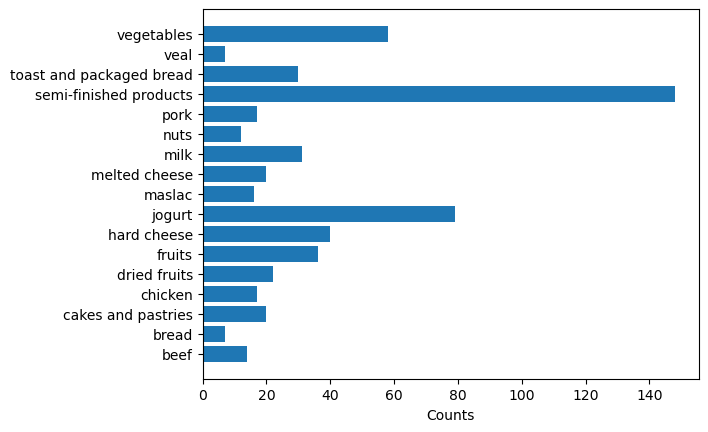

In [41]:
class_counts = df.groupby(['category'], as_index=False).count().rename(columns={'description':'count'})
plt.xlabel('Counts')
plt.barh(class_counts['category'], class_counts['count'])

In [43]:
# this does magic with words
from sklearn.feature_extraction.text import CountVectorizer
# transforms the results of previous magic
from sklearn.feature_extraction.text import TfidfTransformer 
# automatic subdivision dataset to train/test data with changing parts
from sklearn.model_selection import cross_val_score
# Naive Bayes classifyer
from sklearn.naive_bayes import MultinomialNB

In [44]:
count_vect = CountVectorizer() # created the vectorizer
X_tot = count_vect.fit_transform(df.description) # making word vectors out of our product names
print(X_tot.shape) # just curious, what is the size of the result
# first try just count vectorizer without Tfidf Transformer 
# (the latter reduces weight of frequent words but in our case I have no idea, which words might
# be lowered in weight, may be, mass/volume specified in the product name, but we might 
# cut it off in advance, I think it would be better)

Y_tot = df.category

(574, 913)


In [31]:
product_categ_clf_NB = MultinomialNB() # created the classifyer
